In [0]:
import os
import re
import math
import numpy as np
import pandas as pd
import seaborn as sn
import random 
import csv
from matplotlib import pyplot as plt
%matplotlib inline
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
#training google news model
filename = 'drive/My Drive/ML Project/folder/GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
#testing model
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7118192911148071)]


In [0]:
def cleanData (Data):

    string = "!@&*~`<>#$,.?-_/\*%=+|;:(){}1234567890"
    stopwords = np.loadtxt('drive/My Drive/ML Project/stopwords.txt',dtype='str')
    #clean all the tweets one by one
    for i in range(Data.shape[0]):
        
        row = Data.iloc[i,1]
        #print(row)
        row = row.lower()
        #delete all the characters in string
        for char in string:
            row = row.replace(char," ")
        row = row.replace('"'," ")
        row = row.replace('“'," ")
        row = row.replace('”'," ")
        row = row.replace("'"," ")
        #removing all stop words
        headline = row.split()
        resultwords  = [word for word in headline if word.lower() not in stopwords]
        row = ' '.join(resultwords)
        #print(row)
        #print("*******************************************************************")

        #saving cleaned data to headline column
        Data.iloc[i,1] = row

    return Data

In [0]:
df = pd.read_csv('drive/My Drive/ML Project/train.txt',sep='\t')

In [0]:
df= df.astype('str')
Data = pd.DataFrame(data=np.empty((df.shape[0])),columns=['empty'])

In [0]:
Data['labels'] = df.iloc[:,0].str[0]
Data['headlines'] = df.iloc[:,0].str[2:]

In [0]:
Data.head(2)

,empty,labels,headlines
0,0.000000e+00,1,increasingly paranoid campbell's begins stockp...
1,6.903014e-310,1,monster truck escapes


In [0]:
Data = Data.drop('empty',axis=1)

In [0]:
Data.head(5)

,labels,headlines
0,1,increasingly paranoid campbell's begins stockp...
1,1,monster truck escapes
2,0,sunday roundup
3,1,birthday card for david axelrod circling aroun...
4,0,morocco cracks down on journalists


In [0]:
cleanedData = cleanData(Data)
cleanedData.head(5)

,labels,headlines
0,1,increasingly paranoid campbell s begins stockp...
1,1,monster truck escapes
2,0,sunday roundup
3,1,birthday card david axelrod circling around af...
4,0,morocco cracks journalists


In [0]:
#return processed data and indexes of headlines with no word in model
def preprocessing(Data):

  X = pd.DataFrame(data=np.zeros((Data.shape[0],300)))
  mean = 0
  count = 0
  indexes = []

  for x in range(Data.shape[0]):

    headline = Data.iloc[x,1]
    words = headline.split()
    mean =0
    for word in words:
      try:
        value = model[word]
      except:
        value = 0
      mean = mean + value
    try:
      if mean == 0:
        count+=1
        indexes.append(x)
    except:
      pass
    X.iloc[x,:] = mean
  print('No of headlines with no word in model=',count)

  return X, indexes
  

In [0]:
#return processed data and indexes of headlines with no word in model
X, indexes = preprocessing(cleanedData)
print(X.shape)
print(len(indexes))

No of headlines with no word in model= 3
(22891, 300)
3


In [0]:
#removing 3 headlines which are not in our model
print(cleanedData.iloc[indexes[0],1])
print(cleanedData.iloc[indexes[1],1])
print(cleanedData.iloc[indexes[2],1])
cleanedData = cleanedData.drop(cleanedData.index[[indexes[0],indexes[1],indexes[2]]])
print(cleanedData.iloc[indexes[0],1])
print(cleanedData.iloc[indexes[1],1])
print(cleanedData.iloc[indexes[2],1])

yazidi
charlottesville

ncis cease print edition
genetics emphatically deny playing part area man s body
bakery s closing nets man ton free éclairs


In [0]:
#removing 3 headlines which are not in our model
print(X.iloc[indexes[0],1])
print(X.iloc[indexes[1],1])
print(X.iloc[indexes[2],1])
X = X.drop(X.index[[indexes[0],indexes[1],indexes[2]]])
print(X.iloc[indexes[0],1])
print(X.iloc[indexes[1],1])
print(X.iloc[indexes[2],1])

0.0
0.0
0.0
-0.201171875
0.647216796875
0.84228515625


In [0]:
Y = cleanedData.loc[:,'labels']

In [0]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.073730,0.819702,0.252075,1.294189,-0.733063,0.781006,-0.676331,-0.635437,1.281738,0.150269,-0.556702,-0.977058,-0.007874,0.946518,-1.371506,0.800049,-0.151611,0.861572,0.397156,-1.469482,-0.215820,0.082031,0.322083,0.247513,1.438721,0.104889,0.517090,-0.237793,-0.266602,0.517532,0.338470,0.480408,-1.259338,-0.444901,-0.639832,0.441223,-0.579590,0.268524,0.743774,0.410889,...,0.060181,0.392822,-0.606445,-0.326782,-0.109619,1.292480,-0.783981,-0.012360,-0.480957,-0.442261,-0.161865,1.127319,1.572723,0.738037,0.720703,-0.647461,-0.390747,0.391357,0.348877,1.662750,0.243042,-0.150391,0.523254,-0.109436,0.027939,0.186218,-0.837662,0.178467,0.909271,0.561279,-0.433594,-0.712891,-0.706543,0.972290,-0.225098,-1.926758,-0.140869,0.036255,0.759980,0.978638
1,0.316406,0.380737,-0.422073,0.101318,0.222900,-0.194336,-0.197998,-0.382568,0.574707,0.073730,0.060303,-0.641602,0.151855,-0.441162,-0.246338,0.011719,-0.295532,0.295654,0.266113,-0.303589,0.242188,0.208008,-0.020020,0.389648,0.584961,-0.567139,-0.004883,0.304810,0.610352,-0.301270,0.071533,-0.268066,-0.120117,0.559570,-0.498230,-0.041504,0.550537,0.183685,-0.103760,0.163086,...,-0.086243,-0.163574,-0.315186,0.344177,0.314941,0.227051,-0.502930,0.473495,-0.388672,0.456543,-0.318909,-0.166016,0.284180,0.010498,0.037842,-0.016968,-0.122681,-0.159180,0.197632,0.217285,-0.187744,-0.140747,0.043015,-0.188232,0.095459,-0.134232,-0.264648,-0.118179,-0.028687,0.057617,-0.585938,-0.046143,-0.410400,0.281738,-0.588379,-0.169434,-0.367065,-0.240234,-0.251373,-0.262695
2,-0.216309,0.288651,-0.267090,0.143982,0.218750,-0.507080,-0.018311,-0.373047,0.081299,0.385742,-0.666992,-0.340820,-0.394043,-0.013672,-0.078369,0.005859,-0.370361,0.162354,0.549805,-0.647461,0.438477,0.190796,0.055664,-0.016113,-0.222656,0.096191,0.222656,0.419434,-0.158447,0.005127,0.110596,0.081787,0.325684,-0.326172,0.084473,0.398438,-0.294922,-0.199585,0.560547,0.463379,...,0.208130,-0.013672,0.369629,0.052246,-0.022949,0.243652,-0.085938,0.139404,-0.125488,0.484863,-0.309082,0.190918,0.238770,0.326660,0.340820,-0.398926,0.064331,-0.344727,-0.112183,0.683594,-0.034668,0.018646,0.088989,0.720703,-0.108032,-0.514648,-0.312622,0.557617,-0.038086,-0.035156,0.653320,-0.248779,0.076172,0.479980,-0.031128,0.017578,-0.414307,-0.164062,-0.317383,0.365112
3,-0.564453,0.799683,-0.086670,1.522217,-0.766113,-0.355713,0.226318,-1.685791,0.572998,0.652588,0.109283,-1.041992,-0.635254,0.028015,-0.418213,-0.066315,-0.526123,0.835938,-0.039429,-1.208008,0.384216,0.934723,0.574463,-0.406128,-0.095947,0.386963,-1.354614,0.509766,0.696777,-0.920105,-0.001953,-0.420389,-0.094330,-0.745209,-0.384033,-0.104614,0.594635,-0.106934,-0.009399,0.062775,...,-0.821411,-0.194077,-0.160828,-1.133301,-0.794678,0.538818,-0.021118,0.099426,-0.757812,0.235046,0.105062,0.115723,0.385010,0.176025,1.259766,-0.680542,-0.264282,-0.568237,-1.536865,0.689087,-0.199463,-0.154068,-0.454834,0.665955,-0.249146,0.335571,-0.607300,0.548279,0.766980,0.477554,-0.721863,0.067627,-0.603027,0.523926,0.160767,-1.221191,-0.605042,0.078766,-0.946289,0.568359
4,-0.149399,0.291626,-0.256714,0.146240,-0.306000,-0.014526,-0.152313,-0.293701,0.109009,0.254883,-0.227051,-0.125671,0.036865,0.187012,-0.536133,-0.082581,0.090332,0.226562,-0.421875,-0.052948,0.590088,-0.078613,0.124512,-0.386963,0.593750,-0.455261,0.219360,0.375000,0.173828,-0.548279,-0.677734,-0.073975,-0.174805,0.323242,0.000488,-0.111572,-0.056519,0.644531,0.023193,0.230804,...,-0.130249,-0.027832,0.267975,-0.099609,-0.189209,0.381836,-0.186279,-0.221436,-0.261963,-0.155151,-0.139984,0.506836,0.316589,0.071970,0.393066,0.046875,0.441772,-0.383530,-0.238770,0.376465,-0.231934,-0.442631,0.384766,0.206543,0.304443,-0.811523,-0.498047,0.506836,-0.092

In [0]:
X = X.to_numpy()
Y = Y.to_numpy()
Y = Y.astype(float)
Y.dtype

dtype('float64')

In [0]:
df = pd.read_csv('drive/My Drive/ML Project/test.txt',sep='\t')

In [0]:
df= df.astype('str')
Data = pd.DataFrame(data=np.empty((df.shape[0])),columns=['empty'])

In [0]:
Data['labels'] = df.iloc[:,0].str[0]
Data['headlines'] = df.iloc[:,0].str[2:]

In [0]:
Data.head(2)

,empty,labels,headlines
0,0.000000e+00,0,"an open letter to editors rejecting #metoo, #m..."
1,6.903010e-310,1,group of christie campaign deserters found in ...


In [0]:
Data = Data.drop('empty',axis=1)

In [0]:
Data.head(5)

,labels,headlines
0,0,"an open letter to editors rejecting #metoo, #m..."
1,1,group of christie campaign deserters found in ...
2,0,noose found in african-american history museum...
3,1,democratic congressman protests trump's enviro...
4,0,rex tillerson calls reports of his ouster 'lau...


In [0]:
testData = cleanData(Data)

In [0]:
testData.head(5)

,labels,headlines
0,0,open letter editors rejecting metoo meat submi...
1,1,group christie campaign deserters found forest
2,0,noose found african american history museum ex...
3,1,democratic congressman protests trump s enviro...
4,0,rex tillerson calls reports ouster laughable


In [0]:
#processed data and return indexes of headlines with no word in model
X_test, indexes = preprocessing(testData)
print(X_test.shape)
print(len(indexes))

No of headlines with no word in model= 0
(5723, 300)
0


In [0]:
Y_test = testData.loc[:,'labels']
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-1.112793,0.780029,0.455811,0.773682,0.039185,0.215210,0.074402,0.212738,0.817383,0.838867,-0.032227,-0.616882,-0.118103,0.157471,-0.435974,-0.208618,0.300903,-0.005371,-0.118973,-0.436371,1.641113,0.687256,-0.181030,-0.256836,0.750366,-0.671387,-0.129272,0.160278,0.532288,-0.926361,-0.078491,-0.885498,-0.621826,0.164429,0.332764,0.255859,0.661987,0.961792,-0.218018,0.769287,...,0.018028,-0.211670,-0.535278,-0.482239,0.120361,0.224365,-0.651489,0.420685,-0.646729,-0.746338,0.302979,1.027100,0.483215,-0.176514,0.428345,-0.668945,-0.528748,-0.209900,0.266418,1.190430,-0.124023,-0.069092,-0.208344,0.412598,0.354492,0.668030,0.125977,1.134766,0.370728,0.572144,-0.314667,-0.791748,-0.379883,1.155762,0.494080,0.300537,0.562561,-0.772583,-0.414795,0.691650
1,0.704102,0.338440,-0.088043,0.130981,0.600811,-0.598633,-0.385010,-0.323828,0.222122,-0.048828,0.437500,-0.752441,-0.763672,0.200562,-0.635498,0.007690,0.316284,0.204834,-0.895203,0.090317,0.293335,-0.046265,-0.405273,-0.188354,-0.280029,-1.048950,-0.690002,0.282471,0.400558,-0.228981,0.452637,-0.053329,-0.500977,-0.116272,-0.317017,-0.705933,-0.006088,-0.331055,0.645020,-0.031677,...,0.206177,-0.295654,0.515854,0.492676,-0.035034,-0.212646,-1.162292,-0.244873,-0.569824,-0.025391,0.618042,0.238770,0.489990,-0.134521,0.133118,-0.053223,0.061035,-0.335180,0.073486,0.233276,-0.036133,-0.684326,0.433838,0.152161,-0.083130,-0.684692,-0.920166,0.236450,0.718506,0.424561,-0.377930,-0.047363,-0.583496,-0.127228,-0.168091,-0.421387,0.439209,-0.144379,0.791382,0.365540
2,-0.220215,1.229004,0.310913,1.768066,-0.280273,-0.634094,0.148682,-0.867163,0.567627,-0.423828,0.231720,-1.950684,-1.410400,0.058472,-0.809570,0.268921,-0.577515,1.371338,-0.315674,-0.523438,0.056030,-0.620117,0.173988,-1.152908,-0.953384,0.159851,-2.281982,0.570312,0.327866,-0.204079,0.267822,0.098480,-1.051025,-0.138062,-0.007385,0.194824,-0.482895,0.886230,0.475708,0.537613,...,-0.230957,0.182745,0.146484,0.280396,0.056885,1.218689,0.715347,-0.534851,-1.497498,-0.647705,-0.343719,0.656250,0.109009,0.257385,1.064758,-0.669250,-1.190918,-0.305420,-0.795410,0.575439,0.806274,1.077515,-0.174744,0.546387,-1.460144,0.169556,-0.326172,0.687378,0.866943,-0.736816,-0.870361,0.158844,-0.388428,1.505493,-0.430908,-0.593018,-0.137207,-0.065277,-0.132751,-0.126831
3,-0.460495,0.960876,0.474609,1.914612,-0.471741,-1.516251,-0.466263,-0.202026,1.495361,0.725769,-0.024559,-1.408997,-0.213440,0.124939,-1.322021,0.587769,0.429932,1.172485,-0.380981,-1.040771,0.501831,0.220215,0.456909,0.303772,-0.681274,0.091736,-1.321869,-0.466980,1.772461,-0.426208,0.851898,-0.291260,-2.051270,1.538696,0.679382,-0.830322,1.382278,1.021851,0.757233,1.598877,...,-0.624252,-0.104004,0.681213,1.674805,1.634033,1.262512,-1.766602,-0.261185,-1.568848,-0.537323,-0.358978,0.681274,-0.558777,0.260132,-0.604980,-1.306702,-0.208801,-1.509399,-1.819580,0.596619,-0.349731,0.139893,1.188721,1.613647,-0.378708,-0.753395,-1.018738,-0.440735,1.644531,-0.495605,-0.433350,-1.399902,-1.244823,0.199219,1.128784,-0.080750,0.847412,-0.405518,1.558411,2.097168
4,-0.460938,0.085632,-0.272705,-0.189941,-0.072021,-0.117081,0.158081,-0.726074,0.934082,0.249512,-0.253174,-0.492432,-0.233398,0.087036,0.198486,1.014038,0.193872,-0.141113,-0.408813,-0.433533,0.558655,-0.030396,0.416504,-0.301270,-0.409180,-0.273331,-0.986816,0.327393,0.171692,-0.057373,-0.205566,-0.067749,-0.613403,-0.364258,0.126801,0.491699,0.032532,0.872070,0.343109,0.912842,...,0.387939,0.747559,0.082764,1.142822,0.121094,0.526062,-0.579102,-0.485596,-0.325287,-0.320190,-0.317139,0.629883,0.609955,-0.645020,0.107910,-0.156754,-0.174988,0.126953,0.034668,0.833697,-0.240234,-0.219727,-0.056152,0.136017,0.194824,-0.472412,-0.363770,0.062317,0.0

In [0]:
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()
Y_test = Y_test.astype(float)
Y_test.dtype

dtype('float64')

In [0]:
Y[Y==0]=-1
print(Y[0:50])
Y_test[Y_test==0]=-1
print(Y_test[0:50])

[ 1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1.
  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1.
 -1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1.]
[-1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1.
  1.  1. -1. -1. -1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1.
 -1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1.  1.]


In [0]:
def learning (X,Y,weights, epochs):

  for x in range(epochs):

    m =0
    print(x)

    for y in range(X.shape[0]):
      
      prd = np.dot(weights[0:X.shape[1]],X[y,:])

      if (Y[y]*prd) <= 0:
        weights[0:X.shape[1]] = weights[0:X.shape[1]] + (np.dot(Y[y],X[y,:]))
        m = m + 1
      
    if m == 0:
      break

  return weights

In [0]:
epochs = 90
weights = np.zeros((np.size(X,axis=1)))
weights = learning(X,Y,weights,epochs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


In [0]:
#predict test data on base of thetas value provided
def finalpredict(X, weights):
    '''
    Calculates the hypothesis for any input sample `X` given the parameters `thetas`.
    
    Arguments
    ---------
    X : float array
        The input sample.
    
    thetas : float array
        The parameters for the regression function.
    
    Returns
    -------
    h_x : float array
        The hypothesis for input sample.
    '''
    #pridicts class 
    h_x = np.dot(X,weights[0:X.shape[1]])

    #threshold for 1 and 0 prediction 
    for i in range(np.size(h_x)):
        if (h_x[i] > 0):
            h_x[i] = 1
        else:
            h_x[i] = -1
    

    return h_x

In [0]:
#creates confusion matrix from actual and predicted tags and value of precision, recall etc
def confusionMatrix (my_Y, Y):

    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for i in range(np.size(my_Y)):

        if(Y[i] == 1):
            if(my_Y[i] == 1):
                TP +=1

        if(Y[i] == 1):
            if(my_Y[i] == -1):
                FN+=1

        if(Y[i] == -1):
            if(my_Y[i] == -1):
                TN+=1

        if(Y[i] == -1):
            if(my_Y[i] == 1):
                FP+=1

    ConfMatrix = [[TP,FP],
                  [FN,TN]]
    print('Confusion Matrix:\n',ConfMatrix)

    Accuracy = (TP+TN)/(TP+TN+FN+FP)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1 = (2*(Precision*Recall))/(Precision+Recall)

    df_cm = pd.DataFrame(ConfMatrix, index = [i for i in "10"],
                  columns = [i for i in "10"])
    plt.figure(figsize = (5,5))
    sn.heatmap(df_cm, annot=True)
    
    
    print('Accuracy = ', Accuracy)
    print('Precision = ', Precision)
    print('Recall = ', Recall)
    print('F1 score = ', F1)

    return 0

Confusion Matrix:
 [[2258, 1588], [469, 1408]]
Accuracy =  0.6405731259828761
Precision =  0.5871034841393655
Recall =  0.828016134946828
F1 score =  0.6870530959987828


0

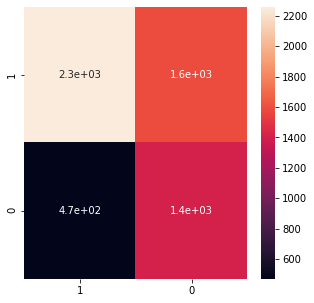

In [0]:
my_Y = finalpredict(X_test,weights) #predict test data on base of thetas value provided
confusionMatrix(my_Y, Y_test)